# Exploration of the 2014 FARS Auto Fatalities Dataset
**Author:** Alex Nisnevich

This is a brief exploration of the data in `data/fatalities-2014-allfields.tsv`, which was obtained from the [Fatality Analysis Reporting System](http://www-fars.nhtsa.dot.gov//QueryTool/QuerySection/SelectYear.aspx) (I used _"Option 3 (Crash / Vehicle / Driver / Precrash / Occupant)"_ as the combination of tables).

You can use the FARS web UI to query for other years, to limit the number of columns (I chose to export all columns here, but many of them will probably not be useful for you), and to do some basic query operations (e.g. limit individual fields to specific values or ranges).

## 0. Prerequisites

First run in the terminal:
```
pip install -r requirements.txt
```

(It may be helpful to do this inside a virtualenv).

Now we can import `pandas`:

In [1]:
%matplotlib inline

import pandas as pd

## 1. Load the data

In [2]:
fatalities_df = pd.read_csv("../data/fatalities-2014-allfields.tsv", sep="\t")

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,6,8,9,23,24,25,27,29,30,31,34,35,36,39,40,41,42,43,52,53,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,89,90,91,92,94,96,97,99,101,104,108,110,112,113,114,115,116,117,118,120,121,125,127,129,134,135,136,137,138,139,152,153,154,155,173,174,179,180,181,183,184,185,186,188,189,192) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fatalities_df.shape

(66971, 193)

Let's see what some of the records look like:

In [4]:
fatalities_df.head()

,statenum,casenum,vnumber,pnumber,arrhr,arrmin,arrtime,atmcond,atmcond2,city,...,preimpstab,vehmanvr,roadalgn,roadprof,surfcond,surftype,spdlim,traflane,contdev,trafflow
0,1,1,1,1,1,35,135,1,0,0,...,1,14,2,1,1,2,45,2,0,1
1,1,1,1,2,1,35,135,1,0,0,...,1,14,2,1,1,2,45,2,0,1
2,1,2,1,1,13,50,1350,1,0,0,...,1,1,1,1,1,2,40,2,0,1
3,1,3,1,1,3,10,310,1,0,3050,...,1,1,1,1,1,2,45,5,3,2
4,1,3,1,2,3,10,310,1,0,3050,...,1,1,1,1,1,2,45,5,3,2


Hmm, these column names aren't very useful. I've prepared a field mapping by scraping the full field names from the FARS web UI. Here's how to use it to get more descriptive column names:

In [5]:
field_mapping = pd.read_csv("../data/fatalities-fieldnames.tsv", sep="\t")
fatalities_df.columns = field_mapping.fieldname

In [6]:
fatalities_df.head()

fieldname,State Number,Case Number,Vehicle Number,Person Number,Crash Arrival Hour EMS,Crash Arrival Minute EMS,Crash Arrival Time EMS,Crash Atmospheric Condition (1),Crash Atmospheric Condition (2),Crash City,...,Precrash Pre - Impact Stability,Precrash Pre-Event Movement(Prior To Recognition Of Critical Event),Precrash Roadway Alignment,Precrash Roadway Grade,Precrash Roadway Surface Condition,Precrash Roadway Surface Type,Precrash Speed Limit,Precrash Total Lanes in Roadway,Precrash Traffic Control Device,Precrash Trafficway Description
0,1,1,1,1,1,35,135,1,0,0,...,1,14,2,1,1,2,45,2,0,1
1,1,1,1,2,1,35,135,1,0,0,...,1,14,2,1,1,2,45,2,0,1
2,1,2,1,1,13,50,1350,1,0,0,...,1,1,1,1,1,2,40,2,0,1
3,1,3,1,1,3,10,310,1,0,3050,...,1,1,1,1,1,2,45,5,3,2
4,1,3,1,2,3,10,310,1,0,3050,...,1,1,1,1,1,2,45,5,3,2


Ah, that's better.

Let's take a look a one individual record:

In [7]:
fatalities_df.ix[0]

fieldname
State Number                                                                 1
Case Number                                                                  1
Vehicle Number                                                               1
Person Number                                                                1
Crash Arrival Hour EMS                                                       1
Crash Arrival Minute EMS                                                    35
Crash Arrival Time EMS                                                     135
Crash Atmospheric Condition (1)                                              1
Crash Atmospheric Condition (2)                                              0
Crash City                                                                   0
Crash County                                                                71
Crash Date (mmddyyyy)                                                  1012014
Crash Day                                 

And let's get some basic statistics for each column (this is more relevant for some columns than for others):

In [8]:
fatalities_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fieldname,,,,,,,,
State Number,66971.0,2.796349e+01,1.637707e+01,1.0,12.00,28.00,42.00,56.00
Case Number,66971.0,6.646237e+02,7.200442e+02,1.0,170.00,403.00,835.00,3255.00
Vehicle Number,66971.0,1.451315e+00,9.726437e-01,1.0,1.00,1.00,2.00,40.00
Person Number,66971.0,1.684236e+00,2.047625e+00,1.0,1.00,1.00,2.00,51.00
Crash Atmospheric Condition (1),66971.0,3.293157e+00,8.700148e+00,1.0,1.00,1.00,2.00,99.00
Crash County,66971.0,9.448935e+01,9.766467e+01,0.0,31.00,71.00,119.00,820.00
Crash Date (mmddyyyy),66971.0,6.956674e+06,3.364039e+06,1012014.0,4162014.00,7142014.00,10062014.00,12312014.00
Crash Day,66971.0,1.578229e+01,8.847184e+00,1.0,8.00,16.00,23.00,31.00
Crash Hour,66971.0,1.333298e+01,8.631075e+00,0.0,8.00,14.00,18.00,99.00


## 2. Let's explore some fields!

What are the most represented states?

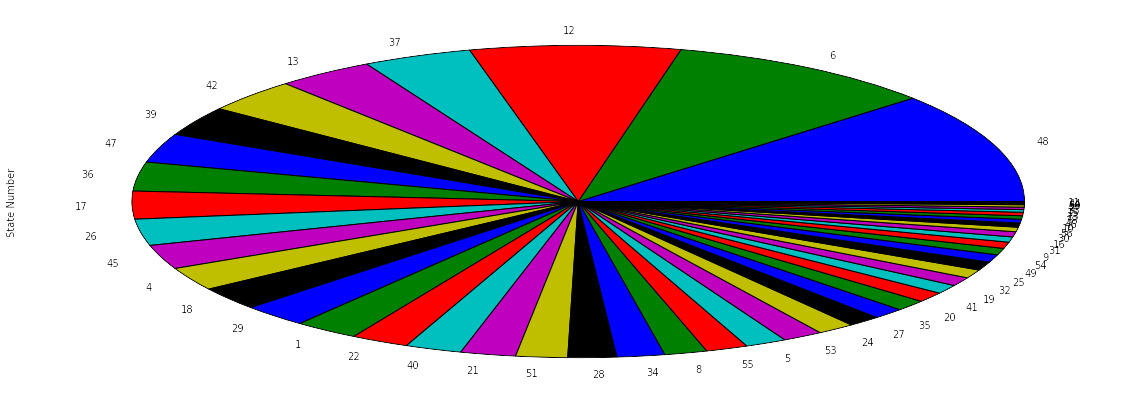

In [12]:
_ = fatalities_df["State Number"].value_counts().plot.pie(figsize=(20, 7))

Judging from the [ANSI state code list](https://www.census.gov/geo/reference/ansi_statetables.html), looks like it's Texas, California, and Florida, in that order.

What's the distribution of # of occupants per vehicle?

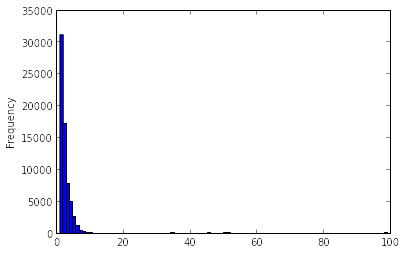

In [20]:
_ = fatalities_df["Vehicle Number of Occupants"].plot.hist(bins=100)

How about # of fatalities per vehicle?

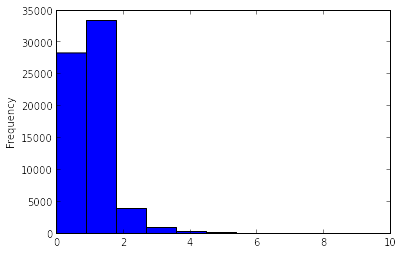

In [17]:
_ = fatalities_df["Vehicle Number Of Fatalities In Vehicle"].plot.hist()

Many of the fields are integers but represent categorical data, and so you need to know the coding scheme before you can interpret them.

You can see what the codes for each field mean using the [FARS web UI](http://www-fars.nhtsa.dot.gov/QueryTool/QuerySection/SelectYear.aspx) or you can make use of a text file I made from a quick scrape of the web UI: `[]`